<a href="https://colab.research.google.com/github/MohameddAkmall/Codveda-Internship/blob/main/Codveda_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset ML Project Report
1. Introduction

Dataset: Iris dataset (contains 150 samples of iris flowers, with 4 numerical features: sepal length, sepal width, petal length, petal width, and one categorical target: species).

Goal: Build and evaluate multiple machine learning models for classification.

Models Used:

K-Nearest Neighbors (KNN)

Decision Tree

Logistic Regression

Random Forest

Support Vector Machine (SVM)
***************************************

1. Import needed Libraries

In [3]:
# Data handling
import pandas as pd

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Normalization / Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Train-test split
from sklearn.model_selection import train_test_split

# Model
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree



# Metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns



Lets start by level one tasks



---------------------------------
 Data preprocessing
---------------------------------


-----------------------------
Load & Inspect Data


In [4]:
# Load the dataset
df = pd.read_csv("/content/1) iris.csv")

# Quick look at the dataset
print(df.head())
print(df.info())
print(df.isnull().sum())  # check missing values


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Handle Missing Data


In [5]:
# In Iris, usually no missing values, but here's how you’d handle them:
# Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after handling:\n", df.isnull().sum())


Missing values after handling:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


/tmp/ipython-input-3877075602.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Encode Categorical Variables

In [6]:
# Encode the 'species' column (categorical → numeric)
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

print("Encoded target values:", df["species"].unique())
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Encoded target values: [0 1 2]
Mapping: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}


Normalize / Standardize Numerical Features

In [7]:
# Standardize numeric features
scaler = MinMaxScaler()
df[["sepal_length", "sepal_width", "petal_length", "petal_width"]] = scaler.fit_transform(
    df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
)

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  species
0      0.222222     0.625000      0.067797     0.041667        0
1      0.166667     0.416667      0.067797     0.041667        0
2      0.111111     0.500000      0.050847     0.041667        0
3      0.083333     0.458333      0.084746     0.041667        0
4      0.194444     0.666667      0.067797     0.041667        0


Split into Training and Validation Sets

In [8]:
# Define features and target
X = df.drop("species", axis=1)
y = df["species"]

# Split into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (120, 4)
Validation set shape: (30, 4)


---------------------
Train KNN Model
---------------------

In [9]:
# Initialize KNN with K=3 (default start)
knn = KNeighborsClassifier(n_neighbors=3)

# Train on training data
knn.fit(X_train, y_train)

# Predict on validation data
y_pred = knn.predict(X_val)


Evaluate Performance

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



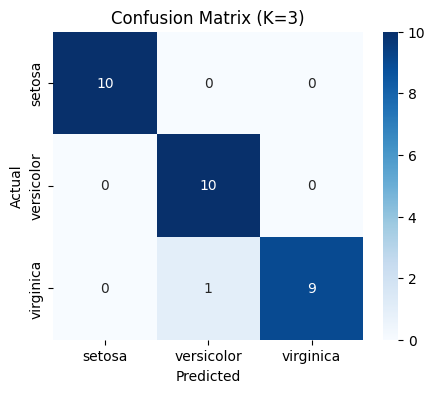

In [10]:
# Accuracy
acc = accuracy_score(y_val, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (K=3)")
plt.show()


Try Different Values of K

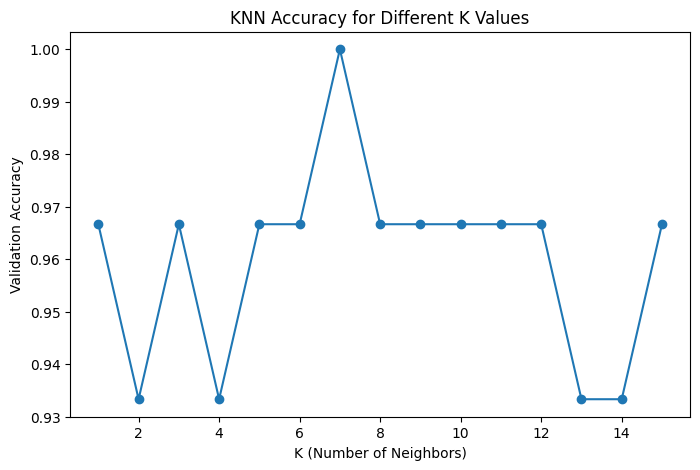

In [11]:
# Compare accuracy for different K values
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred))

# Plot results
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.show()


Level 2   
------------------
Decesion Tree
------------------



Train the Decision Tree

In [12]:
# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Train
dtree.fit(X_train, y_train)

# Predict
y_pred = dtree.predict(X_val)


Evaluate the Decision Tree Model

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Decision Tree Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Visualizaiton of Decision Tree Model

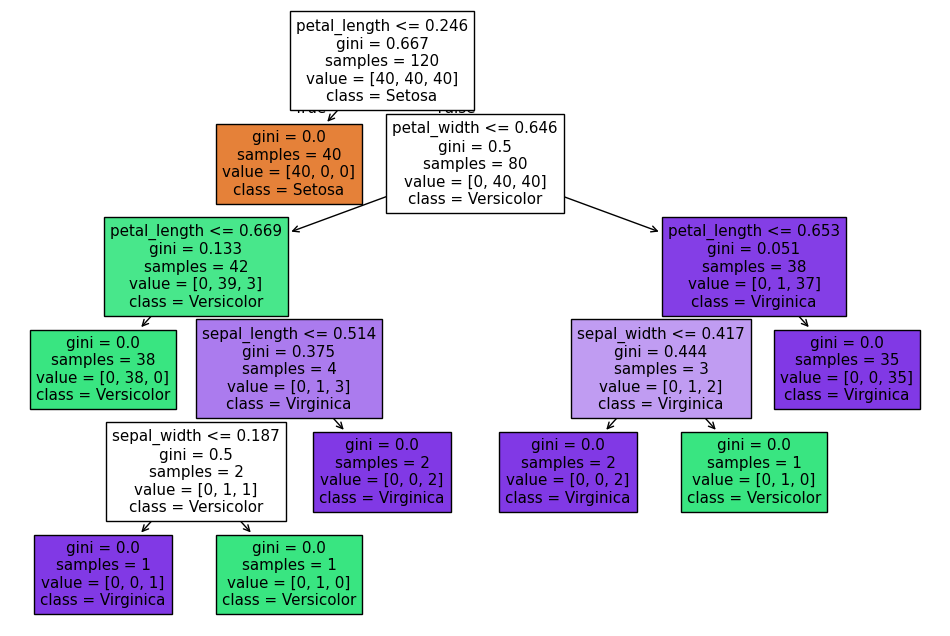

In [14]:
plt.figure(figsize=(12,8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Setosa','Versicolor','Virginica'])
plt.show()


Prune the Tree

In [15]:
# Pruned tree with max depth of 3
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

# Predictions
y_pred_pruned = dt_pruned.predict(X_val)

# Evaluation
print("Pruned Accuracy:", accuracy_score(y_val, y_pred_pruned))
print("Pruned F1-score (macro):", f1_score(y_val, y_pred_pruned, average="macro"))


Pruned Accuracy: 0.9666666666666667
Pruned F1-score (macro): 0.9665831244778612


------------------------------------------
Logistic regression for binary classification
-------------------------

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_curve, auc


Prepare Binary Dataset

In [17]:
# Select only two classes: setosa (0) and versicolor (1)
binary_mask = (y == 0) | (y == 1)
X_binary = X[binary_mask]
y_binary = y[binary_mask]

# Train-test split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)

print("Training samples:", X_train_bin.shape[0])
print("Testing samples:", X_test_bin.shape[0])


Training samples: 80
Testing samples: 20


Train Logistic Regression

In [18]:
# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_bin, y_train_bin)

# Predictions
y_pred_bin = log_reg.predict(X_test_bin)
y_prob_bin = log_reg.predict_proba(X_test_bin)[:, 1]  # probability for class 1


Interpret Coefficients & Odds Ratios

In [19]:
import numpy as np
import pandas as pd

# Model coefficients
coefficients = log_reg.coef_[0]
features = pd.DataFrame({
    "Feature": [f"Feature {i}" for i in range(X.shape[1])],
    "Coefficient": coefficients,
    "Odds Ratio": np.exp(coefficients)
})

print(features)


     Feature  Coefficient  Odds Ratio
0  Feature 0     1.441276    4.226083
1  Feature 1    -1.699004    0.182866
2  Feature 2     2.848201   17.256708
3  Feature 3     2.730399   15.339008


Evaluate Model

In [20]:
# Metrics
acc = accuracy_score(y_test_bin, y_pred_bin)
prec = precision_score(y_test_bin, y_pred_bin)
rec = recall_score(y_test_bin, y_pred_bin)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


ROC Curve

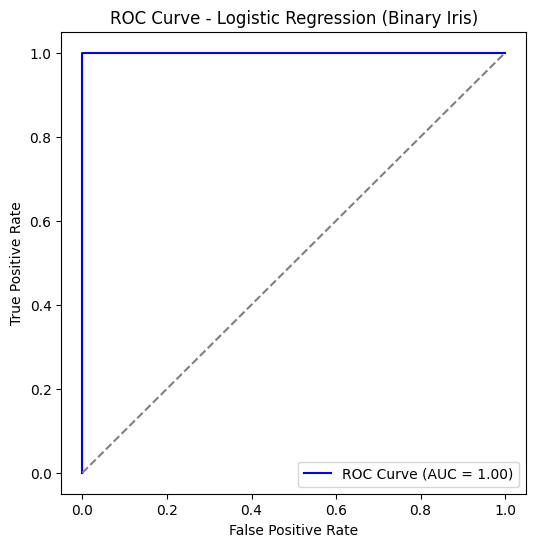

In [21]:


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Binary Iris)")
plt.legend(loc="lower right")
plt.show()


Level 3

Random forest
-------------------

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Train Random Forest with Hyperparameter Tuning

In [24]:
# Build Random Forest with tuning
rf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=5,        # maximum depth of each tree
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_val)


Evaluate Model with Cross-Validation

In [25]:
# Cross-validation (5 folds)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Precision, Recall, F1-score
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_val, y_pred_rf))


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.9666666666666668

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Feature Importance Analysis

Feature Importances:
 Petal Width     0.438141
Petal Length    0.431641
Sepal Length    0.115972
Sepal Width     0.014246
dtype: float64


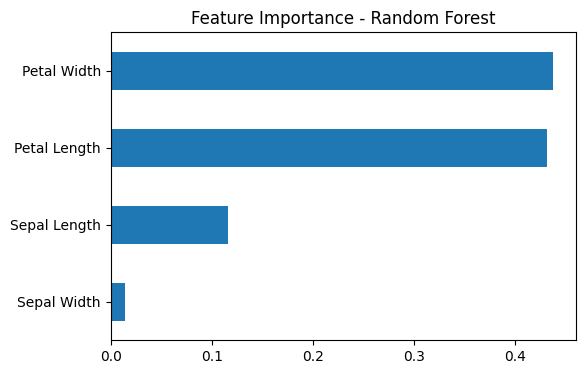

In [26]:

# Feature importance
feature_importance = pd.Series(rf.feature_importances_,
                               index=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

print("Feature Importances:\n", feature_importance.sort_values(ascending=False))

# Plot
feature_importance.sort_values().plot(kind="barh", figsize=(6,4), title="Feature Importance - Random Forest")
plt.show()


SVM
-------------------------

Extend imports

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize



Train SVM with Linear Kernel

In [31]:
# Train SVM with linear kernel
svm_linear = SVC(kernel="linear", probability=True, random_state=42)
svm_linear.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_val)
y_prob_linear = svm_linear.predict_proba(X_val)

print("Linear Kernel Accuracy:", accuracy_score(y_val, y_pred_linear))
print("Classification Report:\n", classification_report(y_val, y_pred_linear))


Linear Kernel Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Train SVM with RBF kernel

In [33]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel="rbf", probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_val)
y_prob_rbf = svm_rbf.predict_proba(X_val)

print("RBF Kernel Accuracy:", accuracy_score(y_val, y_pred_rbf))
print("Classification Report:\n", classification_report(y_val, y_pred_rbf))


RBF Kernel Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



ROC-AUC (One-vs-Rest for Multiclass)

In [34]:
# Binarize labels for multiclass ROC-AUC
y_test_bin = label_binarize(y_val, classes=[0,1,2])

# ROC-AUC for linear kernel
auc_linear = roc_auc_score(y_test_bin, y_prob_linear, average="macro", multi_class="ovr")
print("Linear Kernel ROC-AUC:", auc_linear)

# ROC-AUC for rbf kernel
auc_rbf = roc_auc_score(y_test_bin, y_prob_rbf, average="macro", multi_class="ovr")
print("RBF Kernel ROC-AUC:", auc_rbf)


Linear Kernel ROC-AUC: 0.9933333333333333
RBF Kernel ROC-AUC: 0.9966666666666667


Visualize Decision Boundaries (2 Features)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


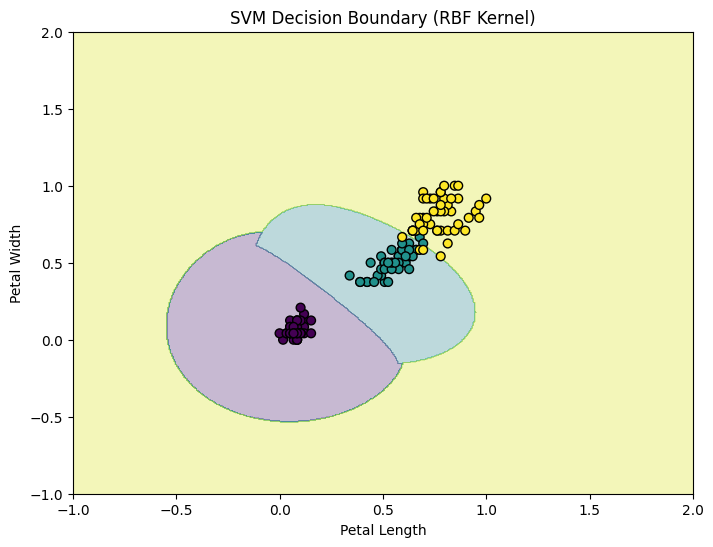

In [38]:
# Use only 2 features for visualization (petal length, petal width)
X_vis = X.iloc[:, 2:4]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train with RBF kernel for visualization
svm_vis = SVC(kernel="rbf", probability=True, random_state=42)
svm_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundary
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_vis.iloc[:,0], X_vis.iloc[:,1], c=y, s=40, cmap="viridis", edgecolor="k")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()